<h1 style="color:#88bddb">What will i do in this notebook?</h1>

- 1.<a href="#1">Importing the libraries</a>


- 2.<a href="#2">Load the data</a>


- 3.<a href="#3">EDA</a>


- 4. Data Preprocessing 
- - 4-0.<a href="#4_0">Duplicate customers?</a>
- - 4-1.<a href="#4_1">Dropping useless columns</a>
- - 4-2.<a href="#4_2">Missing values</a>
- - 4-3.<a href="#4_3">Encoding</a>


- 5.<a href="#5">Strorytelling - Visualization :</a>
- - 5_1.<a href="#5_1">Linear correlations</a>
- - 5_2.<a href="#5_2">Exited_Gender_IsActive</a>
- - 5_3.<a href="#5_3">Dangerous range !</a>
- - 5_4.<a href="#5_4">Customer regions</a>
- - 5_5.<a href="#5_5">Balances</a>
- - 5_6.<a href="#5_6">Number of purchased products</a>


- 6.<a href="#6">Prepare data for machine learning</a>
- - 6_1.<a href="#6_1">Train_test split</a>
- - 6_2.<a href="#6_2">Scaling</a>
- - 6_3.<a href="#6_3">SMOTE (a.k.a. synthetic minority over-sampling technique)</a>


- 7.<a href="#7">Train the models</a>
- - 7-1.<a href="#7_1">Logistic regression</a>
- - 7-1-2.<a href="#7_1_2">What's the effect of SMOTE ?</a>
- - 7-2.<a href="#7_2">KNN classifier</a>
- - 7-3.<a href="#7_3">Gaussian Naive Bayes</a>
- - 7-4.<a href="#7_4">Classification tree</a>
- - 7-5.<a href="#7_5">Support vector classifier</a>
- - 7-6.<a href="#7_6">Random forest</a>
- - 7-7.<a href="#7_7">AdaBoost</a>
- - 7-8.<a href="#7_8">XGBoost</a>


- 8.<a href="#8">Final step</a>
- - 8-1.<a href="#8_1">Models comparison</a>
- - 8-2.<a href="#8_2">Final model confusion matrix</a>

<a id = "1"></a>
## 1. Importing the libraries

In [1]:
# EDA
#------------------
import numpy as np
import pandas as pd



# Visualization
#------------------
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns



# Preprocessing
#------------------
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Models
#------------------
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



# Evaluation
from sklearn import metrics

<a id = "2"></a>
## 2. Load and Prepare Data

In [2]:
data = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')

<a id = "3"></a>
## 3. EDA

In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id = "4"></a>
## 4. Data Preprocessing

<a id = "4_0"></a>
<h2 style="color:#005b96">4-0. Do we have any duplicate customers?</h2>

In [7]:
print("In this dataset from {all} customers, {num} of them are unique.".format(all = len(data) ,
                                                                               num = len(data.CustomerId.unique())))

In this dataset from 10000 customers, 10000 of them are unique.


<a id = "4_1"></a>
<h2 style="color:#005b96">4-1. Dropping useless columns:</h2>

- RowNumber
- CustomerId
- Surname

In [8]:
data.drop(labels = ['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

<a id = "4_2"></a>
<h2 style="color:#005b96">4-2. Missing values:</h2>

In [9]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h2 style="color:tomato">**No missing values so no need to dropna or impute**</h2>

<a id = "4_3"></a>
<h2 style="color:#005b96">4-3. Encoding:</h2>

- Geography --> OneHotEncoding
- Gender    --> LabelEncoding

In [10]:
print("Geography unique values :" , '-'*25 , sep = '\n')
print(data.Geography.value_counts())

Geography unique values :
-------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [11]:
data = pd.concat([pd.get_dummies(data['Geography']) , data] , axis = 1)
data.drop(labels = 'Geography' , axis = 1 , inplace = True)

In [12]:
data['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)

<h2 style="color:#009b96">Our data until now:</h2>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   France           10000 non-null  uint8  
 1   Germany          10000 non-null  uint8  
 2   Spain            10000 non-null  uint8  
 3   CreditScore      10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


- <h2 style="color:#009b96">Every thing seems to be good.</h2>
- <h2 style="color:tomato">What about scaling ?!</h2>
- <h2 style = "color:#009b96">I will do that in part 6-1, after the visualiaztion and storytelling.</h2>

<a id = "5"></a>
## 5. Strorytelling - Visualization

<a id = "5_1"></a>

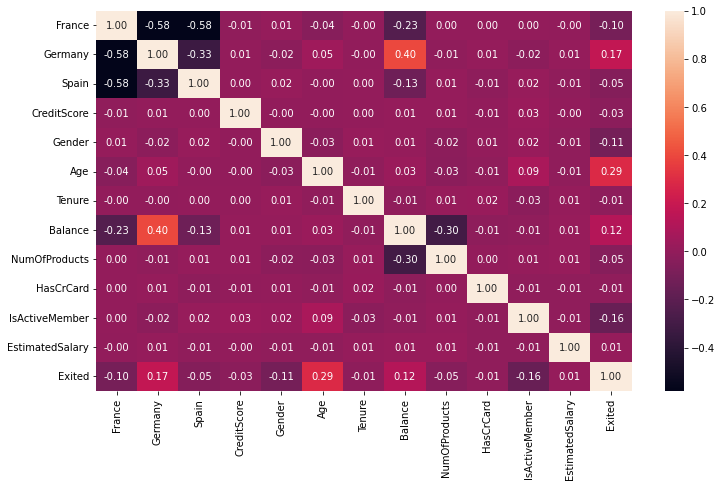

In [14]:
plt.figure(figsize = (12,7))
sns.heatmap(data = data.corr() , cmap = 'rocket' , annot = True , fmt = '.2f')
plt.show()

<h2 style="color:#005b96">5-1. Heat map results :</h2>

- <h3 style="color:#009b96">There is not a strong <u>linear relation</u> between target and input features.</h3>
- <h3 style="color:#009b96">But between all the input features, age, belonging to Germany, being an active member and balance are more linearly related to the target.</h3>

<a id = "5_2"></a>

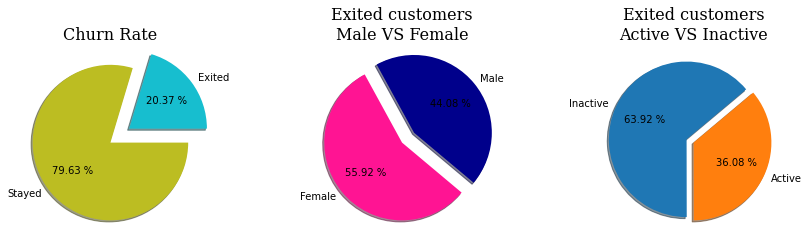

In [15]:
plt_fnt = {'family':'serif' , 'size':16}

plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.8 , top = 2 , wspace = 0.5 , hspace = None)
plt.subplot(1,3,1)
plt.pie(x = [len(data[data['Exited'] == 1]) , len(data[data['Exited'] == 0])]  , labels = ['Exited' , 'Stayed'],
       autopct = '%.2f %%' , shadow = True , explode = [0.3,0] , colors = ['tab:cyan' , 'tab:olive'])
plt.title("Churn Rate" , fontdict = plt_fnt)

plt.subplot(1,3,2)
plt.pie(x = [ len(data[(data.Exited == 1) & (data.Gender == 1)]) , len(data[(data.Exited == 1) & (data.Gender == 0)]) ]
       , labels = ['Male' , 'Female'] , shadow = True , explode = [0.2,0] , startangle = -40 , autopct = '%.2f %%'
       , colors = ['darkblue','deeppink'])
plt.title('Exited customers\nMale VS Female' , fontdict = plt_fnt)

plt.subplot(1,3,3)
plt.pie(x = [len(data[(data.Exited == 1) & (data.IsActiveMember == 0)]),len(data[(data.Exited == 1)&(data.IsActiveMember==1)])]
       , labels = ['Inactive' , 'Active'] , autopct = '%.2f %%' , shadow = True , explode = [0.1,0] 
       , startangle = 40)
plt.title('Exited customers\nActive VS Inactive' , fontdict = plt_fnt)


plt.show()

<h2 style="color:#005b96">5-2. Pie plot results:</h2>

- <h3 style="color:#009b96">Simply out of every 10 customers, 2 of them have exited.</h3>
- <h3 style="color:#009b96">The second plot is showing that the churn rate is higher between female customers.</h3>
- <h3 style="color:#009b96">So its more probable to lose a female customer.</h3> 
- <h3 style="color:#009b96">Also from the third plot it's obvious that the probability of losing an inactive customer is higher.</h3> 

<a id = "5_3"></a>

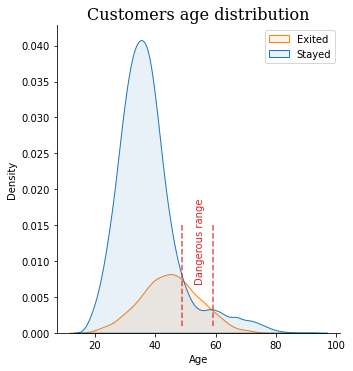

In [16]:
age_kernel_exited = data[data.Exited == 1]['Age'].mode()[0]
age_kernel_stayed = data[data.Exited == 0]['Age'].mode()[0]
sns.displot(data = data , x = 'Age' , hue = 'Exited' , fill = True , kind = 'kde' , legend = False , alpha = 0.1)
plt.legend(labels = ['Exited' , 'Stayed'])
plt.plot([49 , 49] , [0.001,0.015] , linestyle = '--' , c = 'tab:red' , alpha = 0.8)
plt.plot([59 , 59] , [0.001,0.015] , linestyle = '--' , c = 'tab:red' , alpha = 0.8)
plt.title('Customers age distribution' , fontdict = plt_fnt)
plt.text(53 , 0.007 ,'Dangerous range' , rotation = 90 , color ='tab:red')
plt.show()

<h2 style="color:#005b96">5-3. KDE results:</h2>

- <h3 style="color:#009b96">The plot is showing that approximately between 49 and 59 there is a <u>dangerous range.</u> </h3>
- <h3 style="color:#009b96">Which the number of exiting customers is more than the number of customers who stayed.</h3>
- <h3 style="color:#009b96">So there is a higher probability to lose a customer with age from 49 to 59 years old.</h3> 

<a id = "5_4"></a>

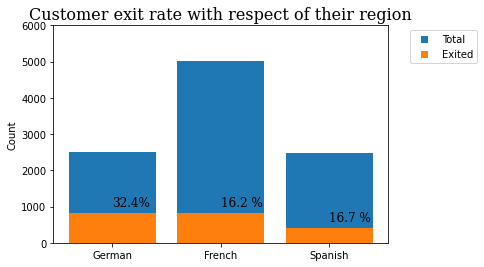

In [17]:
# by num_german --> i mean total german customers
num_german = len(data[data.Germany == 1])
num_french = len(data[data.France == 1])
num_spanish = len(data[data.Spain == 1])

# by ex_german --> i mean exited german customers
ex_german = len(data[(data.Germany == 1) & (data.Exited == 1)])
ex_french = len(data[(data.France == 1) & (data.Exited == 1)])
ex_spanish = len(data[(data.Spain == 1) & (data.Exited == 1)])

# by german_ex_rate --> i mean exit rate of german customers
german_ex_rate = ex_german/num_german
french_ex_rate = ex_french/num_french
spanish_ex_rate = ex_spanish/num_spanish

plt.ylim(0,6000)
plt.bar(x = ['German' , 'French' , 'Spanish'] , height = [num_german , num_french , num_spanish])
plt.bar(x = ['German' , 'French' , 'Spanish'] , height = [ex_german , ex_french , ex_spanish])

color_legend = {'Total':'tab:blue' , 'Exited':'tab:orange'}
handles = [Line2D([0], [0], marker='s', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in color_legend.items()]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Customer exit rate with respect of their region' , fontdict = plt_fnt)
plt.ylabel('Count')

small_font = {'family':'serif' , 'size':12}
plt.text('German' , 1000 , "{:.1f}%".format(german_ex_rate*100) , fontdict = small_font)
plt.text('French' , 1000 , "{:.1f} %".format(french_ex_rate*100) , fontdict = small_font)
plt.text('Spanish' , 600 , "{:.1f} %".format(spanish_ex_rate*100) , fontdict = small_font)

plt.show()

<h2 style="color:#005b96">5-4. Bar plot results:</h2>

- <h3 style="color:#009b96">Most of our customers are French.</h3>
- <h3 style="color:#009b96">German customers have the highest exit rate (32.4%).</h3>
- <h3 style="color:#009b96">So there is a higher probability to lose a German customer.</h3> 

<a id = "5_5"></a>

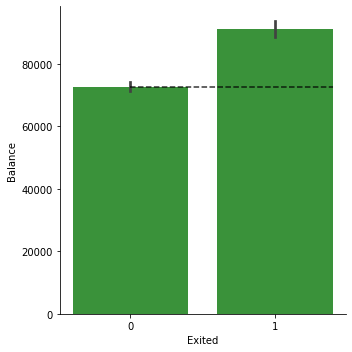

In [18]:
sns.catplot(data = data , x = 'Exited'  , y = 'Balance' , kind = 'bar' , color = 'tab:green')
plt.plot([0,1.4],[data[data.Exited == 0]['Balance'].mean(),data[data.Exited == 0]['Balance'].mean()],linestyle = '--' , c ='k'
         , alpha = 0.8)
plt.show()

<h2 style="color:#005b96">5-5. Bar plot results:</h2>

- <h3 style="color:#009b96">It seems that exited customers are richer(due to their accounts not the estimated salary) !</h3>

In [19]:
data.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<a id = "5_6"></a>

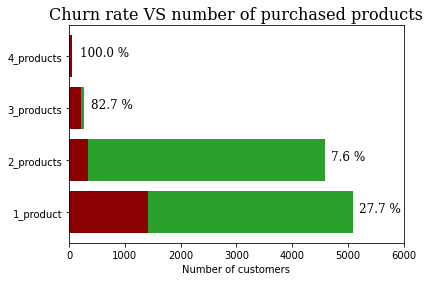

In [20]:
# num_p1 --> number of customers with 1 purchased product
num_p1 = len(data[data.NumOfProducts == 1])
num_p2 = len(data[data.NumOfProducts == 2])
num_p3 = len(data[data.NumOfProducts == 3])
num_p4 = len(data[data.NumOfProducts == 4])

# ex_p1 --> number of exited customers who purchased 1 product
ex_p1 = len(data[(data.NumOfProducts == 1) & (data.Exited == 1)])
ex_p2 = len(data[(data.NumOfProducts == 2) & (data.Exited == 1)]) 
ex_p3 = len(data[(data.NumOfProducts == 3) & (data.Exited == 1)])
ex_p4 = len(data[(data.NumOfProducts == 4) & (data.Exited == 1)])

p1_ex_rate = ex_p1/num_p1
p2_ex_rate = ex_p2/num_p2
p3_ex_rate = ex_p3/num_p3
p4_ex_rate = ex_p4/num_p4

plt.barh(y = ['1_product','2_products','3_products','4_products'] , width = [num_p1,num_p2,num_p3,num_p4], color = 'tab:green')
plt.barh(y = ['1_product','2_products','3_products','4_products'] , width = [ex_p1,ex_p2,ex_p3,ex_p4] , color = 'darkred')

plt.xlim(0,6000)

plt.text(200 , '4_products','{:.1f} %'.format(p4_ex_rate*100),fontdict = small_font)
plt.text(400 , '3_products','{:.1f} %'.format(p3_ex_rate*100),fontdict = small_font)
plt.text(4700 , '2_products','{:.1f} %'.format(p2_ex_rate*100),fontdict = small_font)
plt.text(5200 , '1_product','{:.1f} %'.format(p1_ex_rate*100), fontdict = small_font)

plt.title('Churn rate VS number of purchased products' , fontdict = plt_fnt)
plt.xlabel('Number of customers')

plt.show()

<h2 style="color:#005b96">5-6. Bar plot results:</h2>

- <h3 style="color:tomato">It's too weird, that we losed all 60 customers who have purchased 4 products.</h3>
- <h3 style="color:#009b96">Also we have a big churn rate in customers who have have purchased 3 products.</h3>
- <h3 style="color:#009b96">More products are not satisfying the customers.</h3>
- <h3 style="color:#009b96">Maybe there is a problem in services of the products.</h3>

<a id = "6"></a>
## 6. Prepare Data for Machine learning

<a id = "6_1"></a>
<h2 style="color:#005b96">6-1. Train_test split:</h2>

In [21]:
x_set = data.iloc[:,:-1].values
y_set = data.iloc[:,-1]

x_train , x_test , y_train , y_test = train_test_split(x_set , y_set , test_size = 0.2 
                                                       , random_state = 1)

print("x_train shape -->", x_train.shape)
print("y_train shape -->",y_train.shape)
print("x_test shape  -->",x_test.shape)
print("y_test shape  -->",y_test.shape)

x_train shape --> (8000, 12)
y_train shape --> (8000,)
x_test shape  --> (2000, 12)
y_test shape  --> (2000,)


<a id = "6_2"></a>
<h2 style="color:#005b96">6-2. Scaling:</h2>

In [22]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<a id = "6_3"></a>
<h2 style="color:#005b96">6_3. SMOTE (a.k.a. synthetic minority over-sampling technique):</h2>

- <h3 style="color:#009b96">Until now we have our train and test sets ready.</h3>
- <h3 style="color:#009b96">But the distribution of y_train is imbalanced (you will see it a few steps later).</h3>
- <h3 style="color:#009b96">This makes machine learning classifier tends to be more biased towards the majority class.</h3>
- <h3 style="color:#009b96">There are some techniques to solve this problem, here i will use SMOTE.</h3>

<h2 style="color:tomato">Note :</h2>
<h3 style="color:tomato">For a robust evaluation, there isn't any synthetic sample in the test set !</h3>

In [23]:
oversample = SMOTE(random_state = 1 , k_neighbors = 5)
x_train_resample , y_train_resample = oversample.fit_resample(x_train , y_train)

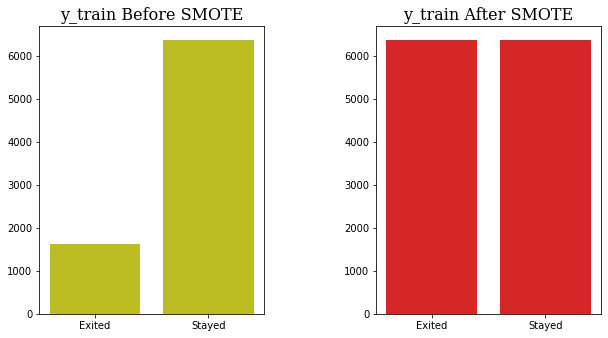

In [24]:
# org_true --> original true class (1)
org_true = 0
org_false = 0

# ovr_true --> over_sampled true class
ovr_true = 0
ovr_false = 0

for item in y_train:
    if item == 1:
        org_true += 1
    elif item == 0:
        org_false += 1

for item in y_train_resample:
    if item == 1:
        ovr_true += 1
    elif item == 0:
        ovr_false += 1

plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.3 , top = 2 , wspace = 0.5 , hspace = None)
plt.subplot(1,2,1)
plt.bar(x = ['Exited' , 'Stayed'] , height = [org_true , org_false] , color = 'tab:olive')
plt.title('y_train Before SMOTE',fontdict = plt_fnt)

plt.subplot(1,2,2)
plt.bar(x = ['Exited' , 'Stayed'] , height = [ovr_true , ovr_false] , color = 'tab:red')
plt.title('y_train After SMOTE' , fontdict = plt_fnt)
plt.show()

<a id = "7"></a>
## 7. Train the model

<a id = "7_1"></a>
<h2 style="color:#005b96">7_1. Logistic regression</h2>

In [25]:
# lr_org --> logistic regression with original trainset
lr_org = LogisticRegression()
lr_org.fit(x_train , y_train)
pred_lr_org = lr_org.predict(x_test)

# lr_ovr --> Logistic regression with oversampled trainset
lr_ovr = LogisticRegression()
lr_ovr.fit(x_train_resample , y_train_resample)
pred_lr_ovr = lr_ovr.predict(x_test)

lr_org_acc = metrics.accuracy_score(y_test , pred_lr_org)
lr_ovr_acc = metrics.accuracy_score(y_test , pred_lr_ovr)
print("Logistic regression trained with original trainset --> accuracy of prediction on test = {:.3f}".format(lr_org_acc))
print("Logistic regression trained with oversampled trainset --> accuracy of prediction on test = {:.3f}".format(lr_ovr_acc))

Logistic regression trained with original trainset --> accuracy of prediction on test = 0.812
Logistic regression trained with oversampled trainset --> accuracy of prediction on test = 0.723


<a id = "7_1_2"></a>
<h2 style="color:#005b96">7_1_2. What's the effect of SMOTE ?</h2>

- <h2 style="color:#009b96">As you see we have got better accuracy without SMOTE.</h2>
- <h2 style="color:tomato">So is SMOTE making the result worse ???</h2>
- <h2 style="color:tomato">The answer is NO!</h2>
<h2 style="color:#009b96">Let's take a look at the confusion matrices :</h2>

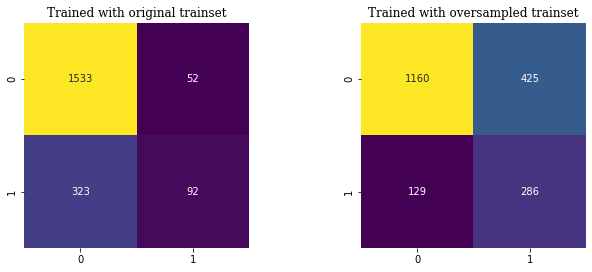

In [26]:
plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.3 , top = 2 , wspace = 0.5 , hspace = None)

plt.subplot(1,2,1)
plt.title('Trained with original trainset' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test , pred_lr_org) , annot = True , fmt = '.0f' , cmap = 'viridis'
            , cbar = False , square = True)

plt.subplot(1,2,2)
plt.title('Trained with oversampled trainset' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test , pred_lr_ovr) , annot = True , fmt = '.0f' , cmap = 'viridis'
           , cbar = False , square = True)



plt.show()

- <h2 style="color:#009b96">Imagine that we are the owner of this business, we want to find exiting customers,
it's not really important for us to predict a customer that will stay (in real scenario), as an exiting customer (a.k.a. FN or false negative).</h2>
- <h2 style="color:#009b96">But it will be costly for us, if we predict a customer that  will exit ( in real scenario), as an staying customer (a.k.a. FP or false positive).</h2>
- <h2 style="color:tomato">So we conclude that in this problem FP is more important for us.</h2>
- <h3 style="color:tomato">So we should also use another evaluation parameter named precision ( TP / (TP + FP) )</h3>
<h2 style="color:tomato">Let's compare the precisions :</h2>

In [27]:
print("In logistic regression:" , end = '\n'+'-'*20+'\n')
print("Precision with original trainset = {:.3f}".format(metrics.precision_score(y_test , pred_lr_org , average = None)[0]))
print("Precision with oversampled trainset = {:.3f}".format(metrics.precision_score(y_test , pred_lr_ovr , average = None)[0]))

In logistic regression:
--------------------
Precision with original trainset = 0.826
Precision with oversampled trainset = 0.900


- <h2 style="color:tomato">As you see in the above cell, the precision is better with oversampling (that's what we wanted !).</h2>
<h3 style = "color: #009b96">So from here i will continue training models with the oversampled trainset . . .</h3>

In [28]:
lr_acc = lr_ovr_acc
lr_pr = metrics.precision_score(y_test , pred_lr_ovr , average = None)[0]

<a id = "7_2"></a>
<h2 style="color:#005b96">7_2. KNN classifier</h2>

In [29]:
knc = KNeighborsClassifier() # the default hyper parameters
knc.fit(x_train_resample , y_train_resample)
pred_knc = knc.predict(x_test)

knc_acc = metrics.accuracy_score(y_test , pred_knc)
# knc_pr --> k nearest classifer precision
knc_pr = metrics.precision_score(y_test , pred_knc , average = None)[0]

print("KNN classifier accuracy =" , knc_acc)
print("KNN precision =" , knc_pr)

KNN classifier accuracy = 0.7575
KNN precision = 0.8985507246376812


<a id = "7_3"></a>
<h2 style="color:#005b96">7_3. Gaussian Naive Bayes</h2>

In [30]:
gnb = GaussianNB() # the default hyper parameters
gnb.fit(x_train_resample , y_train_resample)
pred_gnb = gnb.predict(x_test)

gnb_acc = metrics.accuracy_score(y_test , pred_gnb)
gnb_pr = metrics.precision_score(y_test , pred_gnb , average = None)[0]

print("Gaussian naive bayes accuracy =" , gnb_acc)
print("Gaussian naive bayes precision =" , gnb_pr)

Gaussian naive bayes accuracy = 0.748
Gaussian naive bayes precision = 0.9000740192450037


<a id = "7_4"></a>
<h2 style="color:#005b96">7_4. Classification tree</h2>

best accuracy = 0.81 , in k = 87


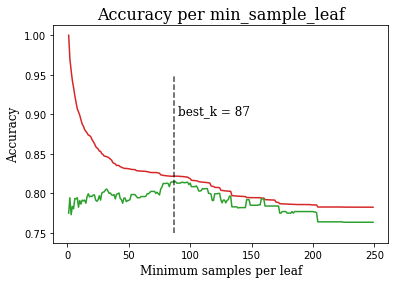

In [31]:
best_acc = 0
best_k = 0
test_acc_arr = []
train_acc_arr = []

for k in range(1,250):
    dt = DecisionTreeClassifier(min_samples_leaf = k)
    dt.fit(x_train_resample , y_train_resample)
    temp_acc = metrics.accuracy_score(y_test , dt.predict(x_test))
    test_acc_arr.append(temp_acc)
    
    train_acc_arr.append(metrics.accuracy_score(y_train_resample , dt.predict(x_train_resample)))
    if temp_acc > best_acc :
        best_acc = temp_acc
        best_k = k

print("best accuracy = {:.2f} , in k = {:}".format(best_acc , best_k))

plt.plot(np.arange(1,250) , train_acc_arr , color = 'tab:red')
plt.plot(np.arange(1,250) , test_acc_arr , color = 'tab:green')
plt.plot([87 , 87] , [0.75 , 0.95] , c = 'k' , linestyle = '--' ,alpha = 0.7)
plt.title('Accuracy per min_sample_leaf', fontdict = plt_fnt)
plt.ylabel('Accuracy'  , fontdict = small_font)
plt.xlabel('Minimum samples per leaf' , fontdict = small_font)
plt.text(90 , 0.9 , 'best_k = 87' , fontdict = small_font)
plt.show()

- <h2 style="color:##009b96">As you see when we put small values for min_samples_leaf, we face to overfitting.</h2>
- <h2 style="color:##009b96">So best min_samples_leaf = 87</h2>

In [32]:
dt = DecisionTreeClassifier(min_samples_leaf = 87)
dt.fit(x_train_resample , y_train_resample)
pred_dt = dt.predict(x_test)

dt_acc = metrics.accuracy_score(y_test , pred_dt)
dt_pr = metrics.precision_score(y_test , pred_dt , average = None)[0]

print("Decision tree classifier accuracy =" , dt_acc)
print("Decision tree classifier precision =" , dt_pr)

Decision tree classifier accuracy = 0.815
Decision tree classifier precision = 0.9079919408999328


<a id = "7_5"></a>
<h2 style="color:#005b96">7_5. Support vector classifier</h2>

In [33]:
svc = SVC(C = 1 , gamma = 0.9 , kernel = 'rbf' , random_state = 1)
svc.fit(x_train_resample , y_train_resample)
pred_svc = svc.predict(x_test)

svc_acc = metrics.accuracy_score(y_test , pred_svc) 
svc_pr = metrics.precision_score(y_test , pred_svc , average = None)[0]

print("Support vector classifier accuracy =" , svc_acc)
print("Support vector classifier precision =" , svc_pr)

Support vector classifier accuracy = 0.7985
Support vector classifier precision = 0.85431654676259


<a id = "7_6"></a>
<h2 style="color:#005b96">7_6. Random forest</h2>

In [34]:
rfc = RandomForestClassifier(random_state = 1 , max_depth = 15 , n_estimators = 1000)
rfc.fit(x_train_resample , y_train_resample)

pred_rfc_test = rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train_resample)

rfc_acc = metrics.accuracy_score(y_test , pred_rfc_test)
rfc_pr = metrics.precision_score(y_test , pred_rfc_test , average = None)[0]
rfc_acc_train = metrics.accuracy_score(y_train_resample , pred_rfc_train)

print("-"*10+"Test"+'-'*10)
print("Random forest accuracy =" , rfc_acc)
print("Random forest precision =" , rfc_pr)
print("-"*10+"Train"+'-'*10)
print("Random forest accuracy on trainset =",rfc_acc_train)

----------Test----------
Random forest accuracy = 0.84
Random forest precision = 0.9000632511068943
----------Train----------
Random forest accuracy on trainset = 0.98447789275635


<a id = "7_7"></a>
<h2 style="color:#005b96">7_7. AdaBoost</h2>

In [35]:
ada = AdaBoostClassifier(learning_rate = 0.25 , n_estimators = 1200 , random_state = 1)
ada.fit(x_train_resample , y_train_resample)
pred_ada = ada.predict(x_test)

ada_acc = metrics.accuracy_score(y_test , pred_ada) 
ada_pr = metrics.precision_score(y_test , pred_ada , average = None)[0]

print("Ada boost accuracy =" , ada_acc)
print("Ada boost precision =" , ada_pr)

Ada boost accuracy = 0.8345
Ada boost precision = 0.9045161290322581


<a id = "7_8"></a>
<h2 style="color:#005b96">7_8. XGBoost</h2>

In [36]:
xgb = XGBClassifier(subsample = 0.9 , random_state = 1 , n_estimators = 1200 , max_depth = 15 , use_label_encoder = False
                   , learning_rate = 0.01 , gamma = 0.1)
xgb.fit(x_train_resample , y_train_resample)
pred_xgb = xgb.predict(x_test)

xgb_acc = metrics.accuracy_score(y_test , pred_xgb) 
xgb_pr = metrics.precision_score(y_test , pred_xgb , average = None)[0]

print("XGBoost classifier accuracy =" , xgb_acc)
print("XGBoost classifier precision =" , xgb_pr)

[18:14:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost classifier accuracy = 0.857
XGBoost classifier precision = 0.8863771564544913


<a id = "8"></a>
## 8. Final step

<a id = "8_1"></a>
<h1 style="color:tomato">8_1. Models comparison</h1>

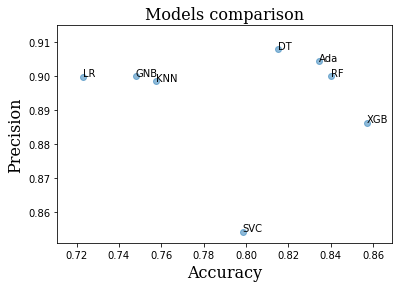

In [37]:
# x --> accuracies
# y --> precisions
labels = ["LR" , "KNN" , "GNB" , "DT" , "SVC" , "RF" , "Ada" , "XGB"]
x = [lr_acc , knc_acc , gnb_acc , dt_acc , svc_acc , rfc_acc , ada_acc , xgb_acc]
y = [lr_pr , knc_pr , gnb_pr , dt_pr , svc_pr , rfc_pr , ada_pr , xgb_pr]

plt.xlim(0.711,0.869)
plt.ylim(0.851,0.915)

plt.title('Models comparison' , fontdict = plt_fnt)
plt.xlabel('Accuracy' , fontdict = plt_fnt)
plt.ylabel('Precision' , fontdict = plt_fnt)

plt.scatter(x , y , alpha = 0.5)
for i in range(len(labels)):
    plt.annotate(labels[i] , (x[i] , y[i]))

- <h2 style="color:#009b96">With the above plot we can compare models with respect of accuracy and precision at the same time.</h2>
- <h2 style="color:#009b96">whatever the model is closer to the <u>top right corner</u>, its a better model for this problem.</h2>

In [38]:
eval_frame = pd.DataFrame()
eval_frame['Model'] = labels
eval_frame['Accuracy'] = x
eval_frame['Precision'] = y
eval_frame.sort_values('Accuracy' , ascending = False)

,Model,Accuracy,Precision
7,XGB,0.8570,0.886377
5,RF,0.8400,0.900063
6,Ada,0.8345,0.904516
3,DT,0.8150,0.907992
4,SVC,0.7985,0.854317
1,KNN,0.7575,0.898551
2,GNB,0.7480,0.900074
0,LR,0.7230,0.899922


- <h2 style="color:#009b96">As you see in the above cell, XGBoost has the best accuracy among the other models.</h2>
- <h2 style="color:tomato">Remember that, not only the accuracy but also the precision is important for us in this problem, i mentioned that in part 7_1_2 .</h2>
- <h2 style="color:#009b96">So because <u>random forest</u> has a better precision, i will choose that as the best model among others.</h2>

<a id = "8_2"></a>
<h1 style="color:tomato">8_2. Random forest confusion matrix</h1>

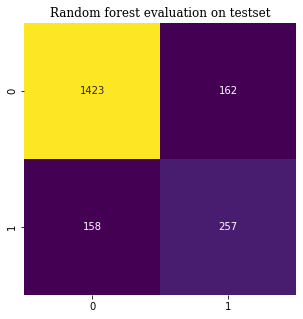

In [39]:
plt.figure(figsize = (5,5))
plt.title('Random forest evaluation on testset' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test , pred_rfc_test) , annot = True , fmt = '.0f' , cmap = 'viridis'
            , cbar = False , square = True)

plt.show()

<h1 style="color:#a56bb5">We are done...</h1>
<h1 style="color:#a56bb5">Thanks for reading</h1>